In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
%matplotlib inline
style.use("ggplot")

accuracy = metrics.accuracy_score

### Instantiate Models

In [29]:
m1 = rforest = RandomForestClassifier()
m2 = logreg = LogisticRegression()
m3 = knn = KNeighborsClassifier()
m4 = gnb = GaussianNB()
m5 = multi = MultinomialNB()
m6 = bernoulli = BernoulliNB()

m7 = poly = svm.SVC(kernel='poly', C=1,gamma='auto')
m8 = rbf = svm.SVC(kernel='rbf', C=1,gamma='auto')
m9 = linear = svm.SVC(kernel='linear', C=1,gamma='auto')
m10 = sigmoid = svm.SVC(kernel='sigmoid', C=1,gamma='auto')

models = [m1,m2,m3,m4,m5,m6]

In [30]:
m = [m7,m8,m9,m10] # Looping through these SVM models lag the script

### Merge Data

In [31]:
train = pd.read_csv("titanic_training.csv", header = 0) 
test = pd.read_csv("titanic_test.csv", header = 0)
ID = test['PassengerId'] # Extract ID Names From Test Set
data = pd.concat([train, test], axis = 0)
data.shape

(1309, 12)

### Delete Columns

In [32]:
del data['Name'], data['Ticket'], data['Cabin'], data['PassengerId']

### Convert Data

In [33]:
def transform_category(category): # Convert each string to a categorical value
    if category == 'Q': return 0
    if category == 'S': return 1
    if category == 'C': return 2

data['Embarked'] = data['Embarked'].apply(transform_category)
data['Sex'] = pd.get_dummies(data['Sex'])

In [34]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [35]:
data.fillna(method = 'ffill', inplace = True)
data = data.astype(float)
train = data[0:891]
test = data[891:]

### Separate Target From Training Data | Delete Survived Column From Test Data

In [36]:
# Grab Location of Survived
print("Shape of Data:", train.shape)
print("Index Location of Target:", train.columns.get_loc("Survived"))

Shape of Data: (891, 8)
Index Location of Target: 7


In [37]:
target = train.ix[:,7] # Separate Target
X = pd.DataFrame(train.ix[:, 0:7]) # Join All Other Data

In [38]:
del test['Survived'] # Delete Target From Testing Set to Match Shape of Training Set

In [39]:
print(target.shape)
print(X.shape)
print(test.shape)

(891,)
(891, 7)
(418, 7)


### Cross Validation 

In [40]:
from sklearn.cross_validation import cross_val_score
for model in models:
    cv_score = cross_val_score(model, X, target, cv=3, scoring = 'precision')
    print("CV Score",cv_score)
    print('Mean CV Score:',np.mean(cv_score))
    print(model, "\n")

CV Score [ 0.77173913  0.74774775  0.71428571]
Mean CV Score: 0.744590864156
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

CV Score [ 0.71153846  0.69421488  0.76344086]
Mean CV Score: 0.723064732596
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

CV Score [ 0.58333333  0.62857143  0.64473684]
Mean CV Score: 0.61888053467
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
       

### Split Data to Test Accuracy on Model

In [41]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.35)

In [42]:
print ("Features For Training Set: ", X_train.shape)
print ("Target Training Set: ", target_train.shape)
print ("Features For Testing Set: ", X_test.shape)
print ("Target For Testing Set: ", target_test.shape)

Features For Training Set:  (579, 7)
Target Training Set:  (579,)
Features For Testing Set:  (312, 7)
Target For Testing Set:  (312,)


### Model Accuracy

In [43]:
for model in models: 
    model.fit(X_train, target_train)
    target_pred = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")
    print(model, "\n")

78.85 % Accuracy
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

77.24 % Accuracy
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

67.31 % Accuracy
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') 

78.53 % Accuracy
GaussianNB(priors=None) 

66.03 % Accuracy
MultinomialNB(alpha=1.0, class_pr

In [44]:
model = m1

In [45]:
model.fit(X_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
target_pred = model.predict(X_test)

In [47]:
print (round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")

80.45 % Accuracy


### Interact

In [48]:
for i in m:
    print(i)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [49]:
from ipywidgets import interact
"""Freezes Sometimes When Using Svc With Interact"""
ranges = [1,100,1]
@interact(c_range = ranges, degree = ranges, gamma = ranges)
def acc(c_range, degree, gamma):
    model = svm.SVC(kernel = 'rbf', C = c_range, degree = degree, gamma = gamma)
    model.fit(X_train, target_train)
    target_test = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")

72.12 % Accuracy


In [23]:
from ipywidgets import interact
@interact(ranges = [1,30,1])
def accuracy(ranges):
    model = KNeighborsClassifier(n_neighbors = ranges)
    model.fit(X_train, target_train)
    target_test = model.predict(X_test)
    print(round(accuracy(target_test, target_pred)*100, 2), "% Accuracy")

76.28 % Accuracy


### Statistics

In [70]:
data.head()

Age  Embarked     Fare  Parch  Pclass  Sex  SibSp  Survived
0  22.0       1.0   7.2500    0.0     3.0  0.0    1.0       0.0
1  38.0       2.0  71.2833    0.0     1.0  1.0    1.0       1.0
2  26.0       1.0   7.9250    0.0     3.0  1.0    0.0       1.0
3  35.0       1.0  53.1000    0.0     1.0  1.0    1.0       1.0
4  35.0       1.0   8.0500    0.0     3.0  0.0    0.0       0.0

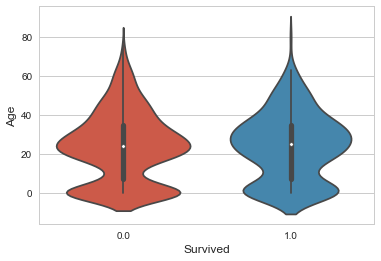

In [79]:
sns.set_style("whitegrid")
ax = sns.violinplot("Survived", "Age" ,figsize=(8,6), data = data)

In [71]:
r_ = data.boxplot(column = 'Fare', by = 'Pclass',figsize=(8,6))

In [61]:
pd.crosstab(data.Fare,data.Age)

Age       0.00   0.17   0.33   0.42   0.67   0.75   0.83   0.92   1.00   \
Fare                                                                      
0.0000        9      0      0      0      0      0      0      0      0   
3.1708        0      0      0      0      0      0      0      0      0   
4.0125        0      0      0      0      0      0      0      0      0   
5.0000        0      0      0      0      0      0      0      0      0   
6.2375        0      0      0      0      0      0      0      0      0   
6.4375        2      0      0      0      0      0      0      0      0   
6.4500        0      0      0      0      0      0      0      0      0   
6.4958        0      0      0      0      0      0      0      0      0   
6.7500        0      0      0      0      0      0      0      0      0   
6.8583        1      0      0      0      0      0      0      0      0   
6.9500        1      0      0      0      0      0      0      0      0   
6.9750        0      0      0      0      0      0      0      0      0   
7.0000        1      0      0      0      0      0      0      0      0   
7.0458        0      0      0      0      0      0      0      0      0   
7.0500        2      0      0      0      0      0      0      0      0   
7.0542        0      0      0      0      0      0      0      0      0   
7.1250        0      0      0      0      0      0      0      0      0   
7.1417        0      0      0      0      0      0      0      0      0   
7.2250        8      0      0      0      0      0      0      0      0   
7.2292       11      0      0      0      0      0      0      0      0   
7.2500        4      0      0      0      0      0      0      0      0   
7.2833        0      0      0      0      0      0      0      0      0   
7.3125        1      0      0      0      0      0      0      0      0   
7.4958        0      0      0      0      0      0      0      0      0   
7.5208        0      0      0      0      0      0      0      0      0   
7.5500        5      0      0      0      0      0      0      0      0   
7.5750        1      0      0      0      0      0      0      0      0   
7.5792        0      0      0      0      0      0      0      0      0   
7.6292        1      0      0      0      0      0      0      0      0   
7.6500        0      0      0      0      0      0      0      0      0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
82.1708       1      0      0      0      0      0      0      0      0   
82.2667       0      0      0      0      0      0      0      0      0   
83.1583       0      0      0      0      0      0      0      0      0   
83.4750       0      0      0      0      0      0      0      0      0   
86.5000       0      0      0      0      0      0      0      0      0   
89.1042       1      0      0      0      0      0      0      0      0   
90.0000       0      0      0      0      0      0      0      0      0   
91.0792       0      0      0      0      0      0      0      0      0   
93.5000       0      0      0      0      0      0      0      0      0   
106.4250      0      0      0      0      0      0      0      0      0   
108.9000      0      0      0      0      0      0      0      0      0   
110.8833      1      0      0      0      0      0      0      0      0   
113.2750      0      0      0      0      0      0      0      0      0   
120.0000      0      0      0      0      0      0      0      0      0   
133.6500      1      0      0      0      0      0      0      0      0   
134.5000      0      0      0      0      0      0      0      0      0   
135.6333      0      0      0      0      0      0      0      0      0   
136.7792      0      0      0      0      0      0      0      0      0   
146.5208      1      0      0      0      0      0      0      0      0   
151.5500      0      0      0      0      0      0      0      1      0   
153.4625      0      0   

# Test on Actual Testing Set

In [24]:
model = m1
target_pred = model.predict(test)
predictions = pd.DataFrame(ID)
def predict(predictions):
    predictions["Survived"] = target_pred
    predictions = predictions.astype(int)
    return predictions

predict(predictions)

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         1
18           910         1
19           911         0
20           912         1
21           913         1
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         1
28           920         1
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
393         1285         0
394         1286         0
395         1287         1
396         1288         0
397         1289         1
398         1290         0
399         1291         0
400         1292         1
401         1293         0
402         1294         1
403         1295         0
404         1296         0
405         1297         0
406         1298         0
407         1299         0
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [25]:
# predictions.to_csv('titanic_submission.csv',index = False)